In [ ]:
#pip install pandas numpy matplotlib

  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 4.3 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 4.5 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 4.5 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 4.5 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 4.7 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 4.5 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 4.5 MB/s eta 0:00:01
   ------------------------------------ --

In [23]:
# %% [markdown]
# # 📊 EDA Rápido en VS Code (Python)
#
# Este archivo .py está dividido en celdas estilo notebook usando `# %%`.
# En VS Code, ejecuta celda por celda (Ctrl+Enter) con la extensión **Jupyter**.
#
# Funcionalidades:
# - Lectura robusta de CSV (prueba separadores: , ; \t |)
# - Vista general: shape, columnas, dtypes, head, sample
# - Valores perdidos (tabla + gráfico)
# - Descriptivos para numéricas y categóricas
# - Matriz de correlación (numéricas)
# - Histogramas y boxplots automáticos (hasta 12 columnas)
# - Detección simple de outliers por Z-score
# - Agregaciones opcionales por categoría
# - Guardar copia limpia `__limpio.csv`

# %%
# ✅ Instalación (opcional): ejecuta si te faltan librerías

import re
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [ ]:
# %% [markdown]
# ## 1) Configura la ruta del CSV
# Reemplaza la ruta por la ubicación real de tu archivo.
# Acepta rutas tipo Windows (`C:\\...`) o Unix (`/home/...`).

# %%
# 👉 EDITA AQUÍ
csv_path = r"C:\lab02\boletas_extraidas_20251016_025612.csv" 


path = Path(csv_path)
assert path.exists(), f"No se encontró el archivo: {path}"
path





In [20]:
df = pd.read_csv(path)
print("✅ CSV leído. Shape:", df.shape)
display(df.head())



✅ CSV leído. Shape: (373, 7)


,archivo_pdf,nro_documento,total_a_pagar,id_cliente,fecha_emision,fecha_vencimiento,consumo
0,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201907.pdf,148429510.0,947.400,2392497-8,02-JUL-2019,26-JUL-2019,"1.090,00"
1,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201908.pdf,150222516.0,1.055.110,2392497-8,02-AGO-2019,27-AGO-2019,"1.214,00"
2,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201909.pdf,152104640.0,993.440,2392497-8,02-SEP-2019,25-SEP-2019,"1.143,00"
3,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201910.pdf,153830950.0,846.650,2392497-8,02-OCT-2019,24-OCT-2019,"974,00"
4,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201911.pdf,155761609.0,848.390,2392497-8,02-NOV-2019,25-NOV-2019,"976,00"


In [13]:
df = leer_csv_robusto(path)
df.head(10)


✅ Leído con separador ','. Shape: (373, 7)


,archivo_pdf,nro_documento,total_a_pagar,id_cliente,fecha_emision,fecha_vencimiento,consumo
0,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201907.pdf,148429510.0,947.400,2392497-8,02-JUL-2019,26-JUL-2019,"1.090,00"
1,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201908.pdf,150222516.0,1.055.110,2392497-8,02-AGO-2019,27-AGO-2019,"1.214,00"
2,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201909.pdf,152104640.0,993.440,2392497-8,02-SEP-2019,25-SEP-2019,"1.143,00"
3,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201910.pdf,153830950.0,846.650,2392497-8,02-OCT-2019,24-OCT-2019,"974,00"
4,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201911.pdf,155761609.0,848.390,2392497-8,02-NOV-2019,25-NOV-2019,"976,00"
5,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201912.pdf,157588230.0,668.590,2392497-8,03-DIC-2019,26-DIC-2019,"769,00"
6,ARGOMEDO_AGUAS_ANDINAS_CALDERA_202001.pdf,159340624.0,631.240,2392497-8,02-ENE-2020,24-ENE-2020,726
7,ARGOMEDO_AGUAS_ANDINAS_CALDERA_202002.pdf,161125638.0,561.860,2392497-8,02-FEB-2020,25-FEB-2020,"627,00"
8,ARGOMEDO_AGUAS_ANDINAS_CALDERA_202003.pdf,162926285.0,529.640,2392497-8,02-MAR-2020,24-MAR-2020,"591,00"
9,ARGOMEDO_AGUAS_ANDINAS_CALDERA_202004.pdf,164732999.0,616.070,2392497-8,02-ABR-2020,23-ABR-2020,"685,00"


In [21]:
# %% [markdown]
# ## 3) Limpieza de columnas numéricas (CLP y consumo con coma decimal)
# - `total_a_pagar`: ej. "1.055.110" -> 1055110.0
# - `consumo`: ej. "1.090,00" -> 1090.00

# %%
def to_float_clp(x):
    """
    Convierte strings de monto/consumo en formato chileno a float.
    - Quita puntos de miles
    - Reemplaza coma decimal por punto
    - Maneja NaN y valores vacíos
    """
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if s == "":
        return np.nan
    # Elimina espacios, puntos de miles y normaliza separador decimal a '.'
    s = s.replace(" ", "").replace(".", "").replace(",", ".")
    try:
        return float(s)
    except Exception:
        return np.nan

for col in ["total_a_pagar", "consumo"]:
    if col in df.columns:
        df[col + "_num"] = df[col].apply(to_float_clp)

display(df[[c for c in df.columns if c.endswith("_num")]].head())

,total_a_pagar_num,consumo_num
0,947400.0,1090.0
1,1055110.0,1214.0
2,993440.0,1143.0
3,846650.0,974.0
4,848390.0,976.0


In [24]:
# ## 4) Parseo robusto de fechas (meses en español/inglés y con distintos separadores)
# Soporta: "02-JUL-2019", "02-AGO-2019", "30 JUN 2025", etc.

# %%
MESES_MAP = {
    # Español
    "ENE": 1, "FEB": 2, "MAR": 3, "ABR": 4, "MAY": 5, "JUN": 6,
    "JUL": 7, "AGO": 8, "SEP": 9, "OCT": 10, "NOV": 11, "DIC": 12,
    # Inglés
    "JAN": 1, "FEB": 2, "MAR": 3, "APR": 4, "MAY": 5, "JUN": 6,
    "JUL": 7, "AUG": 8, "SEP": 9, "OCT": 10, "NOV": 11, "DEC": 12,
}

_pat = re.compile(r"^\s*(\d{1,2})[ \-/_](\w{3})[ \-/_](\d{4})\s*$", re.IGNORECASE)
_pat_num = re.compile(r"^\s*(\d{1,2})[ \-/_](\d{1,2})[ \-/_](\d{2,4})\s*$")

def parse_fecha(s):
    if pd.isna(s):
        return pd.NaT
    txt = str(s).strip().upper()
    # Caso con mes abreviado (ESP/ENG): DD-XXX-YYYY o "DD XXX YYYY"
    m = _pat.match(txt)
    if m:
        d, mon, y = m.groups()
        mon3 = mon[:3]
        mm = MESES_MAP.get(mon3, None)
        if mm:
            return pd.to_datetime(f"{int(y):04d}-{mm:02d}-{int(d):02d}", errors="coerce")
    # Caso DD-MM-YYYY (numérico)
    m2 = _pat_num.match(txt)
    if m2:
        d, m, y = m2.groups()
        y = int(y)
        # normaliza año 2 dígitos
        if y < 100:
            y = 2000 + y
        return pd.to_datetime(f"{y:04d}-{int(m):02d}-{int(d):02d}", errors="coerce")
    # Último intento genérico con dayfirst
    return pd.to_datetime(txt, errors="coerce", dayfirst=True)

for col in ["fecha_emision", "fecha_vencimiento"]:
    if col in df.columns:
        df[col + "_dt"] = df[col].apply(parse_fecha)

display(df[[c for c in df.columns if c.endswith("_dt")]].head())



,fecha_emision_dt,fecha_vencimiento_dt
0,2019-07-02,2019-07-26
1,2019-08-02,2019-08-27
2,2019-09-02,2019-09-25
3,2019-10-02,2019-10-24
4,2019-11-02,2019-11-25


In [25]:
# ## 5) Vista general y tipos

# %%
print("\n▶ Forma (filas, columnas):", df.shape)

print("\n▶ Columnas:")
for i, c in enumerate(df.columns, 1):
    print(f"{i:>2}. {c}")

print("\n▶ dtypes:")
display(df.dtypes.to_frame("dtype"))

print("\n▶ Primeras filas:")
display(df.head())

print("\n▶ Muestra aleatoria:")
display(df.sample(min(5, len(df)), random_state=42))



▶ Forma (filas, columnas): (373, 11)

▶ Columnas:
 1. archivo_pdf
 2. nro_documento
 3. total_a_pagar
 4. id_cliente
 5. fecha_emision
 6. fecha_vencimiento
 7. consumo
 8. total_a_pagar_num
 9. consumo_num
10. fecha_emision_dt
11. fecha_vencimiento_dt

▶ dtypes:


,dtype
archivo_pdf,object
nro_documento,float64
total_a_pagar,object
id_cliente,object
fecha_emision,object
fecha_vencimiento,object
consumo,object
total_a_pagar_num,float64
consumo_num,float64
fecha_emision_dt,datetime64[ns]



▶ Primeras filas:


,archivo_pdf,nro_documento,total_a_pagar,id_cliente,fecha_emision,fecha_vencimiento,consumo,total_a_pagar_num,consumo_num,fecha_emision_dt,fecha_vencimiento_dt
0,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201907.pdf,148429510.0,947.400,2392497-8,02-JUL-2019,26-JUL-2019,"1.090,00",947400.0,1090.0,2019-07-02,2019-07-26
1,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201908.pdf,150222516.0,1.055.110,2392497-8,02-AGO-2019,27-AGO-2019,"1.214,00",1055110.0,1214.0,2019-08-02,2019-08-27
2,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201909.pdf,152104640.0,993.440,2392497-8,02-SEP-2019,25-SEP-2019,"1.143,00",993440.0,1143.0,2019-09-02,2019-09-25
3,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201910.pdf,153830950.0,846.650,2392497-8,02-OCT-2019,24-OCT-2019,"974,00",846650.0,974.0,2019-10-02,2019-10-24
4,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201911.pdf,155761609.0,848.390,2392497-8,02-NOV-2019,25-NOV-2019,"976,00",848390.0,976.0,2019-11-02,2019-11-25



▶ Muestra aleatoria:


,archivo_pdf,nro_documento,total_a_pagar,id_cliente,fecha_emision,fecha_vencimiento,consumo,total_a_pagar_num,consumo_num,fecha_emision_dt,fecha_vencimiento_dt
327,ARGOMEDO_METROGAS_202012.pdf,29035823.0,2.442.618,NaN,27 NOV 2020,NaN,"3.049,46",2442618.0,3049.46,2020-11-27,NaT
33,ARGOMEDO_AGUAS_ANDINAS_CALDERA_202204.pdf,210761031.0,876.631,2392497-8,02-ABR-2022,25-ABR-2022,"846,96",876631.0,846.96,2022-04-02,2022-04-25
15,ARGOMEDO_AGUAS_ANDINAS_CALDERA_202010.pdf,175739412.0,881.180,2392497-8,02-OCT-2020,26-OCT-2020,"983,00",881180.0,983.00,2020-10-02,2020-10-26
314,ARGOMEDO_ENEL_202411.pdf,334082413.0,2.129.859,NaN,20 Nov 2024,NaN,NaN,2129859.0,NaN,2024-11-20,NaT
57,ARGOMEDO_AGUAS_ANDINAS_CALDERA_202404.pdf,259432629.0,1.050.014,2392497-8,NaN,20-ABR-2024,"869,76",1050014.0,869.76,NaT,2024-04-20


,n_miss,%_miss
fecha_emision,164,43.97
fecha_emision_dt,164,43.97
fecha_vencimiento,116,31.10
fecha_vencimiento_dt,116,31.10
id_cliente,116,31.10
consumo_num,66,17.69
consumo,66,17.69
nro_documento,44,11.80
total_a_pagar,20,5.36
total_a_pagar_num,20,5.36


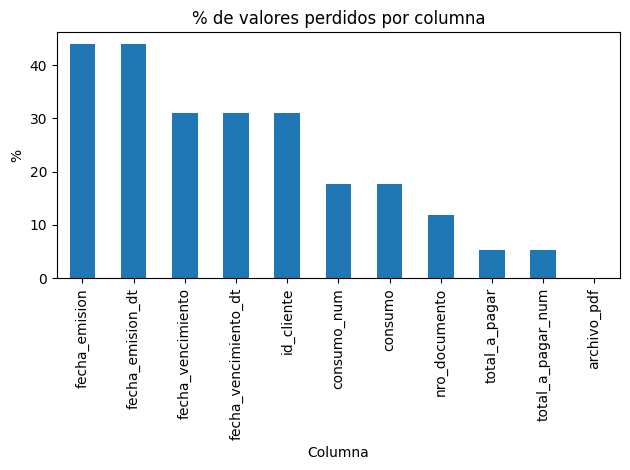

In [26]:
 ## 6) Valores perdidos

# %%
na_total = df.isna().sum().sort_values(ascending=False)
na_pct = (df.isna().mean().sort_values(ascending=False) * 100).round(2)
na_tabla = pd.concat([na_total, na_pct], axis=1)
na_tabla.columns = ["n_miss", "%_miss"]
display(na_tabla)

plt.figure()
na_pct.plot(kind="bar")
plt.title("% de valores perdidos por columna")
plt.ylabel("%")
plt.xlabel("Columna")
plt.tight_layout()
plt.show()


In [28]:
# ## 7) Estadísticos descriptivos (numéricas y categóricas)

# %%
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numéricas:", num_cols)
display(df[num_cols].describe().T if num_cols else pd.DataFrame())

print("\nCategóricas:", cat_cols)
display(df[cat_cols].describe().T if cat_cols else pd.DataFrame())

Numéricas: ['nro_documento', 'total_a_pagar_num', 'consumo_num']


,count,mean,std,min,25%,50%,75%,max
nro_documento,329.0,2.063146e+08,8.120493e+07,27034913.0,1.793461e+08,2.212352e+08,2.616078e+08,349412638.0
total_a_pagar_num,353.0,1.097572e+06,1.695745e+06,492.0,4.765000e+03,3.677700e+04,1.510745e+06,8341307.0
consumo_num,307.0,2.875103e+03,1.315631e+04,0.0,2.515000e+00,2.853000e+01,1.189915e+03,106162.0



Categóricas: ['archivo_pdf', 'total_a_pagar', 'id_cliente', 'fecha_emision', 'fecha_vencimiento', 'consumo']


,count,unique,top,freq
archivo_pdf,373,373,ARGOMEDO_AGUAS_ANDINAS_CALDERA_201907.pdf,1
total_a_pagar,353,321,684,9
id_cliente,257,8,2392497-8,72
fecha_emision,209,134,03-NOV-2020,4
fecha_vencimiento,257,74,22-MAY-2024,5
consumo,307,249,0,32


In [ ]:
# ## 8) Correlación (entre numéricas, incluyendo *_num)

# %%
if num_cols:
    corr = df[num_cols].corr(numeric_only=True)
    display(corr)

    plt.figure()
    plt.imshow(corr, interpolation='nearest')
    plt.title('Matriz de correlación')
    plt.colorbar()
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.tight_layout()
    plt.show()
else:
    print("No hay columnas numéricas para correlación.")

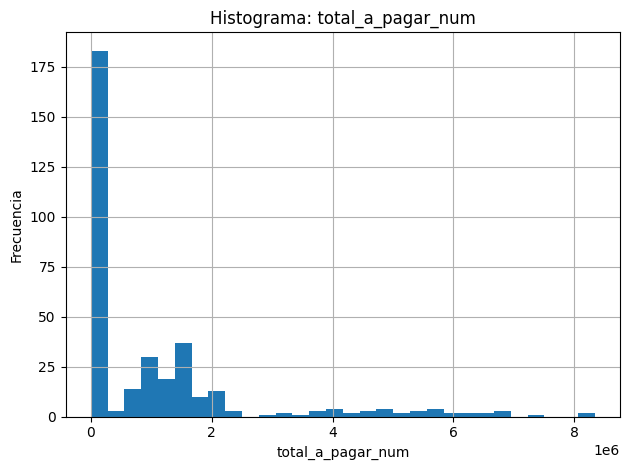

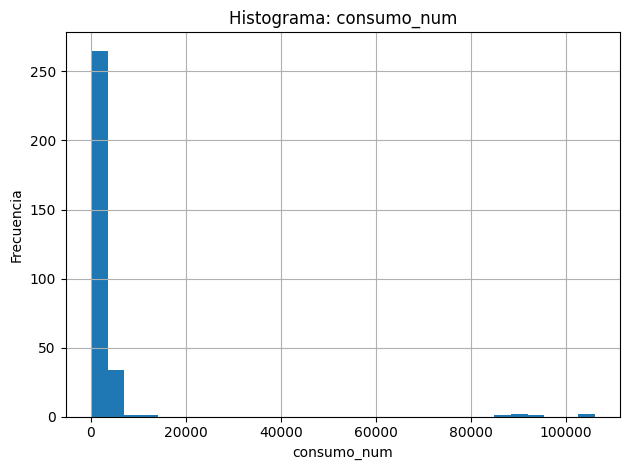

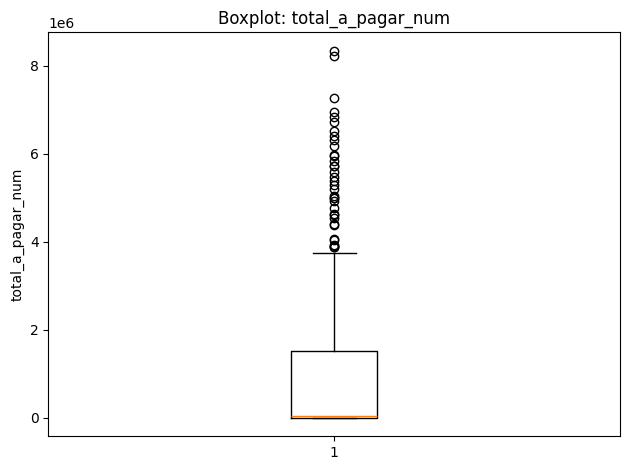

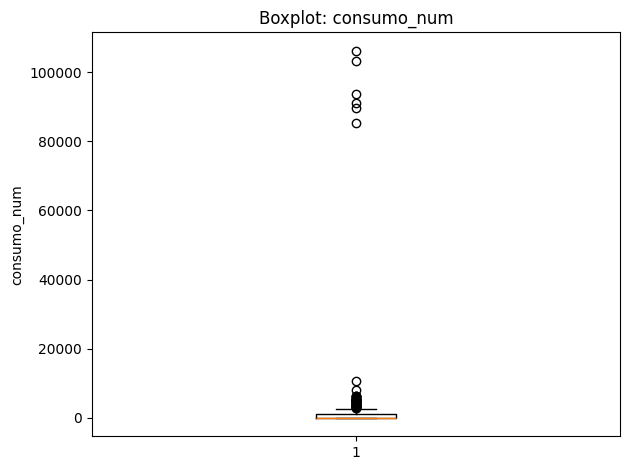

In [29]:
# ## 9) Histogramas y boxplots rápidos (hasta 10 columnas numéricas)

# %%
cols_plot = [c for c in num_cols if c.endswith("_num")] or num_cols
for col in cols_plot[:10]:
    plt.figure()
    df[col].dropna().hist(bins=30)
    plt.title(f"Histograma: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

for col in cols_plot[:10]:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(f"Boxplot: {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

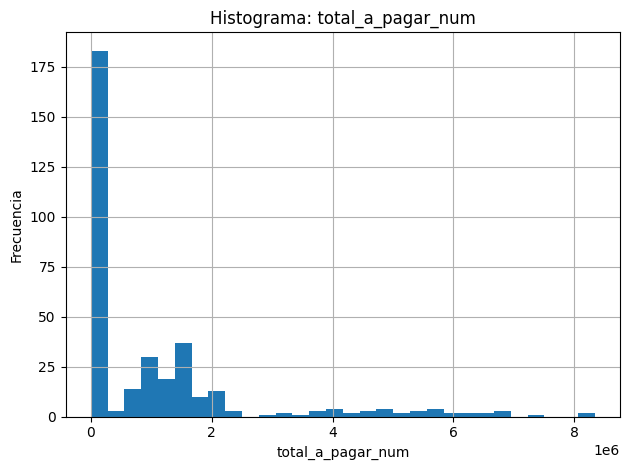

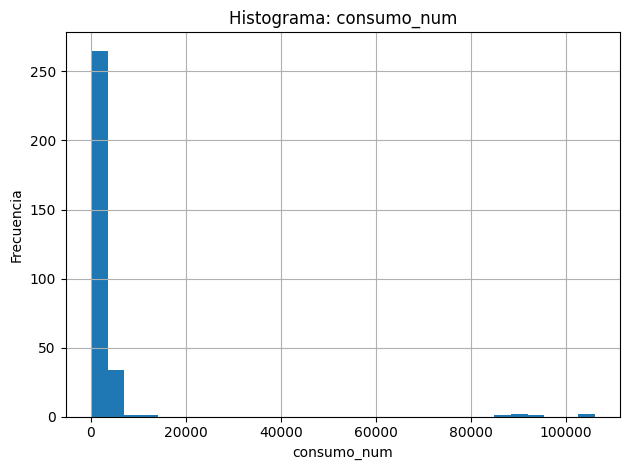

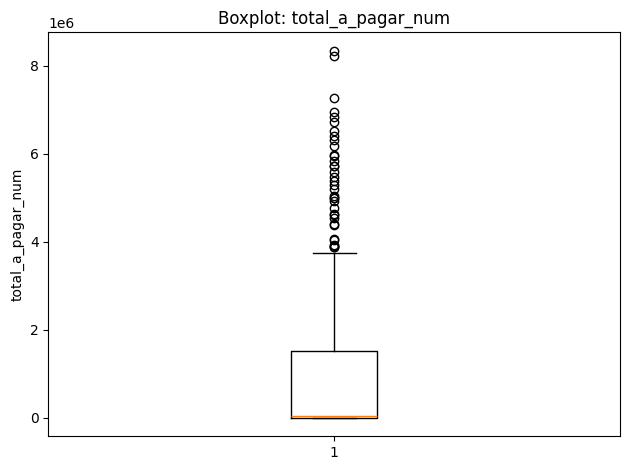

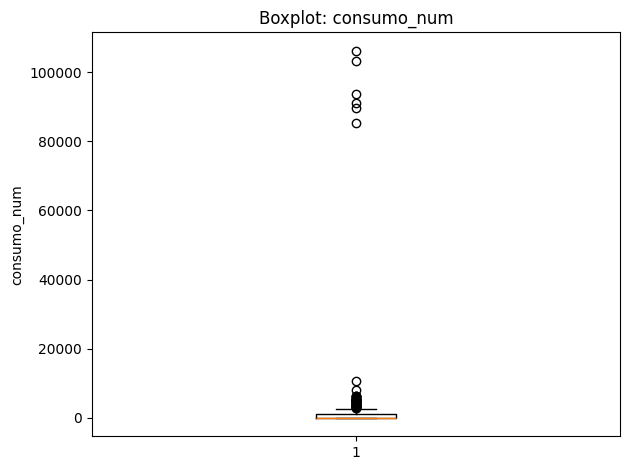

In [30]:
# ## 9) Histogramas y boxplots rápidos (hasta 10 columnas numéricas)

# %%
cols_plot = [c for c in num_cols if c.endswith("_num")] or num_cols
for col in cols_plot[:10]:
    plt.figure()
    df[col].dropna().hist(bins=30)
    plt.title(f"Histograma: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

for col in cols_plot[:10]:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(f"Boxplot: {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()